In [6]:
# In the end we will create a requirements.txt file with all the libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [7]:
df = pd.read_csv(r"EHIS_2019_IT\MICRODATI\EHIS_Microdati_2019.txt", sep='\t', encoding='utf-8')
print("Shape:", df.shape)

Shape: (45930, 244)


In [8]:
df.head(5)

,PID2,HHID2,WGT,PROXY,INTMETHOD,SEX,AGE_CLA75,COUNTRY,REG,RIP,...,PROBF5,PROBF6,ASS_SAN,COLF,BABYS,ASSIST,HCOLF,HBABYS,HASSIST,RISECO
0,1,1,1054.076,1,20,1,6,IT,10,1,...,2,2,1,2,2,2,-2,-2,-2,2
1,2,1,1054.076,1,20,2,6,IT,10,1,...,2,2,1,2,2,2,-2,-2,-2,2
2,3,2,1264.041,1,20,2,7,IT,10,1,...,2,2,1,2,2,2,-2,-2,-2,3
3,4,2,1264.041,1,20,1,4,IT,10,1,...,2,2,1,2,2,2,-2,-2,-2,3
4,5,2,1264.041,1,20,1,1,IT,10,1,...,2,2,1,2,2,2,-2,-2,-2,3


In [9]:
# Nomi colonne
print(df.columns.tolist())
# for each col visualize datatype, for readability not on \n but on the same row
for col in df.columns:
    print(f"{col}: {df[col].dtype}", end=", ")


['PID2', 'HHID2', 'WGT', 'PROXY', 'INTMETHOD', 'SEX', 'AGE_CLA75', 'COUNTRY', 'REG', 'RIP', 'BIRTHPLACE2', 'CITIZEN2', 'BIRTHPLACEFATH2', 'BIRTHPLACEMOTH2', 'HATLEVEL4', 'MAINSTAT', 'POSIZ', 'MARSTALEGAL', 'HHNBPERS', 'HHNBPERS_0_13', 'HHTYPE', 'RELPAR', 'TIPNU2', 'NUMNU2', 'RPNUC2', 'HHINCOME', 'REDPR', 'HS1', 'HS2', 'HS3', 'CD1A', 'CD1a1', 'CD1B', 'CD1b1', 'CD1C', 'CD1c1', 'CD1D', 'CD1d1', 'CD1E', 'CD1e1', 'CUORE', 'CUORE1', 'CD1F', 'CD1f1', 'CD1G', 'CD1g1', 'CD1H', 'CD1h1', 'CD1I', 'CD1i1', 'CD1J', 'CD1j1', 'CD1K', 'CD1k1', 'CD1L', 'CD1l1', 'CD1M', 'CD1m1', 'CD1N', 'CD1n1', 'INREN', 'INREN1', 'CD1O', 'CD1o1', 'CD1P', 'CD1p1', 'ANSIA', 'ANSIA1', 'TUMOR', 'TUMOR1', 'ALZH', 'ALZH1', 'PARKIN', 'PARKIN1', 'ALTCRO', 'ALTCRO1', 'CD2', 'AC1A', 'AC1AN', 'AC1B', 'AC1BN', 'AC1C', 'AC1cN', 'AC2', 'AW1', 'AW2', 'PL1', 'PL2', 'PL3', 'PL4', 'PL5', 'PL6', 'PL7', 'PL8', 'PL9', 'PC1A', 'PC1B', 'PC1C', 'PC1D', 'PC1E', 'PC2', 'PC21AB', 'PC21CEF', 'PC21D', 'PC21G', 'PC3', 'PC45', 'HA1A', 'HA1B', 'HA1C',

In [10]:
# Column names are quite vague, on ISTAT website there is a file with the description of the variables, we use mapping to add a brief description to the columns
with open(r"C:\Users\emanu\SL_ISTAT\Lista delle variabili ISTAT.txt", encoding="utf-8") as f:
    descrizioni = [line.strip() for line in f.readlines()]

print("N colonne nel DataFrame:", len(df.columns))
print("N descrizioni nel file ISTAT:", len(descrizioni))
# n rows match so we can procede

N colonne nel DataFrame: 244
N descrizioni nel file ISTAT: 244


In [11]:
mappa_variabili = list(zip(df.columns, descrizioni))

# check if the number of columns and descriptions match
for nome, descrizione in mappa_variabili[:15]:
    print(f"{nome} → {descrizione}")

# Luckily it does, seams like the columns are in the same order as the descriptions in the file

PID2 → Numero identificativo del rispondente
HHID2 → Numero identificativo della famiglia
WGT → Peso di riporto all'universo
PROXY → Risposta proxy
INTMETHOD → Metodo dell'intervista
SEX → Sesso
AGE_CLA75 → Classe di et
COUNTRY → Paese di residenza
REG → Regione
RIP → Ripartizione geografica
BIRTHPLACE2 → Paese di nascita
CITIZEN2 → Cittadinanza
BIRTHPLACEFATH2 → Paese di nascita del padre
BIRTHPLACEMOTH2 → Paese di nascita della madre
HATLEVEL4 → Titolo di studio


In [12]:
df_mapping = pd.DataFrame({
    "Nome_colonna": df.columns,
    "Descrizione_ISTAT": descrizioni
})

output_path = "Mapping_variabili_EHIS_2019.xlsx"
df_mapping.to_excel(output_path, index=False)
print(f"File salvato in: {output_path}")

File salvato in: Mapping_variabili_EHIS_2019.xlsx


We have a lot of variables so it's quite confusing to look at those alltogether, I want to divide them in MacroThemes to allow us to divide our research into topics and maybe perform some cool things later :)

In [ ]:
def tema(desc):
    desc = desc.lower()

    # ANAGRAFICA E CONTESTO FAMILIARE
    if any(k in desc for k in [
        'identificativo', 'sesso', 'classe di et', 'paese di residenza', 'regione', 'ripartizione geografica',
        'paese di nascita', 'cittadinanza', 'padre', 'madre', 'stato civile',
        'numero componenti', 'tipo di famiglia', 'relazione di parentela', 'tipo di nucleo',
        'figli', 'allattamento'
    ]):
        return "Anagrafica e contesto familiare"

    # CONDIZIONE SOCIO-ECONOMICA
    if any(k in desc for k in [
        'titolo di studio', 'condizione professionale', 'posizione nella professione',
        'quinti di reddito', 'fonte principale di reddito',
        'colf', 'baby sitter', 'spese abitazione', 'ore settimanali', 'persona che assiste'
    ]):
        return "Condizione socio-economica"

    # SALUTE PERCEPITA
    if 'giudizio sullo stato di salute' in desc or 'salute in generale' in desc or 'salute dei suoi denti' in desc:
        return "Salute percepita"

    # CONDIZIONI CRONICHE E LIMITAZIONI
    if 'croniche:' in desc or 'diagnosticata da un medico' in desc or 'limitazioni che durano' in desc:
        return "Condizioni croniche e limitazioni"

    # INFORTUNI E ASSENZE
    if any(k in desc for k in ['incidente', 'infortunio', 'assenze dal lavoro', 'giorni di assenza']):
        return "Infortuni e assenze"

    # LIMITAZIONI FUNZIONALI E AUTONOMIA
    if any(k in desc for k in ['difficoltà', 'aiuto', 'ausili', 'cura della persona', 'attività domestiche']):
        return "Limitazioni funzionali e autonomia"

    # ACCESSO AI SERVIZI SANITARI
    if any(k in desc for k in [
        'visita', 'cure mediche', 'dentista', 'medico di famiglia', 'specialistica',
        'prenotare', 'lista d attesa', 'spesa', 'assistenza domiciliare',
        'accertamenti diagnostici', 'vaccino', 'farmaci prescritti', 'rinuncia'
    ]):
        return "Accesso ai servizi sanitari"

    # SALUTE MENTALE
    if any(k in desc for k in [
        'depressione', 'ansia', 'scarso interesse', 'sentirsi giù', 'agitazione',
        'energia', 'concentrarsi', 'fallimento', 'problemi ad addormentarsi', 'scarsa opinione di sé'
    ]):
        return "Salute mentale"

    # STILI DI VITA
    if any(k in desc for k in [
        'attività fisica', 'cammina', 'bicicletta', 'sport', 'tempo libero',
        'potenziare i muscoli', 'seduto', 'frutta', 'verdura', 'bevande zuccherate',
        'sigarette', 'fumatore', 'fumo', 'sigaretta elettronica', 'acqua', 'appetito'
    ]):
        return "Stili di vita"

    # SUPPORTO SOCIALE E CAREGIVING
    if any(k in desc for k in [
        'persone vicine', 'attenti a quello che le accade', 'aiuto pratico dai vicini',
        'si prende cura', 'assiste', 'ore a settimana'
    ]):
        return "Supporto sociale e caregiving"

    # CONDIZIONI ABITATIVE
    if any(k in desc for k in [
        'abitazione', 'stanze', 'piano', 'scale', 'ascensore', 'spese abitazione',
        'muffe', 'umidità', 'cattive condizioni'
    ]):
        return "Condizioni abitative"

    # METODO E RILEVAZIONE
    if any(k in desc for k in ['proxy', 'intervista', 'metodo']):
        return "Metodo e rilevazione"

    # TECNICO / PONDERAZIONE
    if any(k in desc for k in ['peso']):
        return "Tecnico / ponderazione"

    return "Altro / Da rivedere"


df_mapping["Tema"] = df_mapping["Descrizione_ISTAT"].apply(tema)

output_path = "Mapping_variabili_EHIS_2019.xlsx"
# we save on same excel file but on a different sheet
with pd.ExcelWriter(output_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_mapping.to_excel(writer, sheet_name="Mapping con Tema", index=False)


This Mapping helped us to gave a general overview of the main themes of our variables, ofc since it's based on keywords it might have some mistake due to context so we review the mapping manually on excel and eventually change something if it's not how we like it, I report those here to allow reproducibility, so if by mistake we rerun the whole things we are not gonna lose all the hardwork done :(

In [14]:
# Manual dictionary to override the tema for some rows that are not correctly classified by the function (Altro / Da rivedere)
override_temi = {

    "HHNBPERS_0_13": "Anagrafica e contesto familiare",
    "NUMNU2": "Anagrafica e contesto familiare",
    "RPNUC2": "Anagrafica e contesto familiare",
    "HS2": "Condizioni croniche e limitazioni",
    "AC1AN": "Infortuni e assenze",
    "AC1BN": "Infortuni e assenze",
    "AC1cN": "Infortuni e assenze",
    "PL1": "Vista / Udito",
    "PL2": "Vista / Udito",
    "PL3": "Vista / Udito",
    "PL4": "Vista / Udito",
    "PL5": "Vista / Udito",
    "PL8": "Limitazioni funzionali e autonomia",
    "PL9": "Limitazioni funzionali e autonomia",
    "PC1A": "Limitazioni funzionali e autonomia",
    "PC1B": "Limitazioni funzionali e autonomia",
    "PC1C": "Limitazioni funzionali e autonomia",
    "PC1D": "Limitazioni funzionali e autonomia",
    "PC1E": "Limitazioni funzionali e autonomia",
    "PC45": "Limitazioni funzionali e autonomia",
    "HA1A": "Limitazioni funzionali e autonomia",
    "HA1B": "Limitazioni funzionali e autonomia",
    "HA1C": "Limitazioni funzionali e autonomia",
    "HA1D": "Limitazioni funzionali e autonomia",
    "HA1E": "Limitazioni funzionali e autonomia",
    "HA1F": "Limitazioni funzionali e autonomia",
    "HA1G": "Limitazioni funzionali e autonomia",
    "HA45": "Limitazioni funzionali e autonomia",
    "PN1": "Salute percepita",
    "PN2": "Salute percepita",
    "MH1A": "Salute percepita",
    "MH1B": "Salute percepita",
    "MH1C": "Salute percepita",
    "MH1D": "Salute percepita",
    "MH1E": "Stili di vita",
    "MH1F": "Salute mentale",
    "MH1G": "Salute mentale",
    "MH1H": "Salute mentale",
    "HO12": "Accesso ai servizi sanitari",
    "AM1": "Accesso ai servizi sanitari",
    "LAVDEN": "Stili di vita",
    "DOVEDENT": "Accesso ai servizi sanitari",
    "VVIC": "Accesso ai servizi sanitari",
    "VECO1": "Accesso ai servizi sanitari",
    "VFID": "Accesso ai servizi sanitari",
    "AM6A": "Accesso ai servizi sanitari",
    "AM6B": "Accesso ai servizi sanitari",
    "AM64": "Accesso ai servizi sanitari",
    "AECO1": "Accesso ai servizi sanitari",
    "AFID": "Accesso ai servizi sanitari",
    "MD1": "Accesso ai servizi sanitari",
    "MD2": "Accesso ai servizi sanitari",
    "PA2": "Accesso ai servizi sanitari",
    "PA3": "Accesso ai servizi sanitari",
    "PA4": "Accesso ai servizi sanitari",
    "PA5": "Accesso ai servizi sanitari",
    "PA6": "Accesso ai servizi sanitari",
    "PA7": "Accesso ai servizi sanitari",
    "MAMSINT": "Accesso ai servizi sanitari",
    "INDMAM": "Accesso ai servizi sanitari",
    "CETAMAM": "Accesso ai servizi sanitari",
    "NMAMMO": "Accesso ai servizi sanitari",
    "PA8": "Accesso ai servizi sanitari",
    "PA89": "Accesso ai servizi sanitari",
    "CETAPAPH": "Accesso ai servizi sanitari",
    "NPAPHPV": "Accesso ai servizi sanitari",
    "UN1A": "Accesso ai servizi sanitari",
    "UN1B": "Accesso ai servizi sanitari",
    "BMI_CLASS": "Stili di vita",
    "PE1": "Stili di vita",
    "PE8": "Stili di vita",
    "DH6": "Stili di vita",
    "FUMO": "Stili di vita",
    "SK4_CL": "Stili di vita",
    "CETAFU": "Stili di vita",
    "ABUSO": "Stili di vita",
    "RISCHIO": "Stili di vita",
    "SS1": "Stili di vita",
    "SS3": "Supporto sociale e caregiving",
    "PROBF4": "Condizioni abitative",
    "ASS_SAN": "Condizione socio-economica",
    "COLF": "Condizioni abitative",
    "RISECO": "Condizione socio-economica",
}

df_mapping["Tema"] = df_mapping.apply(
    lambda row: override_temi.get(row["Nome_colonna"], row["Tema"]),
    axis=1
)
df_mapping.to_excel(output_path, sheet_name="Mapping con Tema", index=False)
print(f"File aggiornato e salvato in: {output_path}")

File aggiornato e salvato in: Mapping_variabili_EHIS_2019.xlsx


Yeah this took a lot but it's complitely worth it

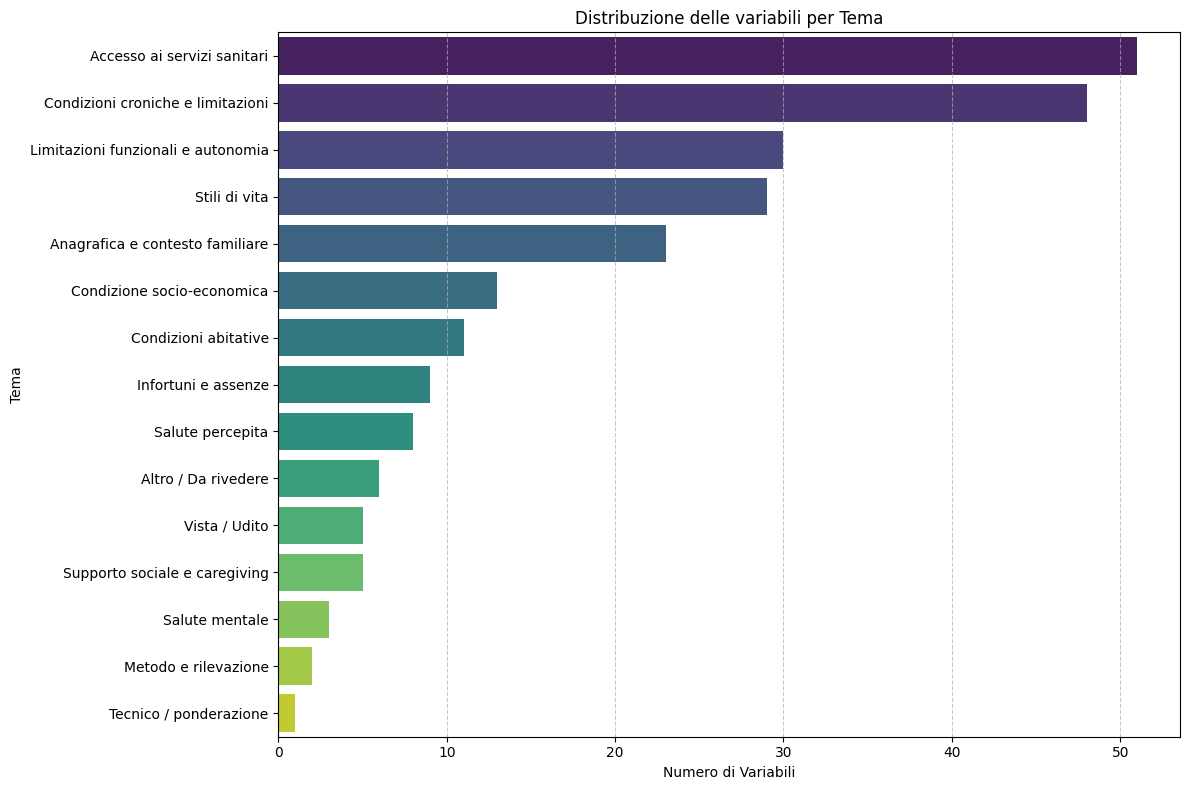

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

tema_counts = df_mapping['Tema'].value_counts().reset_index()
tema_counts.columns = ['Tema', 'Count']

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=tema_counts, y='Tema', x='Count', hue='Tema', palette='viridis', dodge=False, legend=False)
plt.title('Distribuzione delle variabili per Tema')
plt.xlabel('Numero di Variabili')
plt.ylabel('Tema')
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


In [19]:
df

,PID2,HHID2,WGT,PROXY,INTMETHOD,SEX,AGE_CLA75,COUNTRY,REG,RIP,...,PROBF5,PROBF6,ASS_SAN,COLF,BABYS,ASSIST,HCOLF,HBABYS,HASSIST,RISECO
0,1,1,1054.076,1,20,1,6,IT,10,1,...,2,2,1,2,2,2,-2,-2,-2,2
1,2,1,1054.076,1,20,2,6,IT,10,1,...,2,2,1,2,2,2,-2,-2,-2,2
2,3,2,1264.041,1,20,2,7,IT,10,1,...,2,2,1,2,2,2,-2,-2,-2,3
3,4,2,1264.041,1,20,1,4,IT,10,1,...,2,2,1,2,2,2,-2,-2,-2,3
4,5,2,1264.041,1,20,1,1,IT,10,1,...,2,2,1,2,2,2,-2,-2,-2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45925,45958,22794,609.352,1,20,2,11,IT,200,5,...,2,2,1,2,2,2,-2,-2,-2,2
45926,45959,22795,475.785,1,20,2,11,IT,200,5,...,2,2,1,2,2,2,-2,-2,-2,2
45927,45960,22795,475.785,1,20,1,11,IT,200,5,...,2,2,1,2,2,2,-2,-2,-2,2
45928,45961,22796,968.754,1,20,2,10,IT,200,5,...,2,2,1,2,2,2,-2,-2,-2,2


In [23]:
def extract_df_by_tema(df, df_mapping, tema):
    colonne_tema = df_mapping[df_mapping["Tema"] == tema]["Nome_colonna"].tolist()
    colonne_presenti = [col for col in colonne_tema if col in df.columns]
    return df[colonne_presenti]


# Accesso ai servizi sanitari

In [25]:
tema_scelto = "Accesso ai servizi sanitari"
df_tema_servizi_sanitari = extract_df_by_tema(df, df_mapping, tema_scelto)
df_tema_servizi_sanitari.head()

,HO12,AM1,DOVEDENT,AM2,AM3,AM4,VSTRUT,VVIC,VECO1,VFID,...,PA8,PA89,CETAPAPH,NPAPHPV,UN1A,UN1B,UN2A,UN2B,UN2C,UN2D
0,0,3,-2,1,0,-1,-2,-2,-2,-2,...,-2,-2,-2,-2,1,2,3,3,3,3
1,0,3,-2,1,0,1,1,1,2,2,...,2,2,9,2,2,2,2,2,2,3
2,0,1,2,1,2,1,1,2,1,1,...,4,3,9,2,1,1,1,2,2,2
3,2,1,2,1,0,1,1,1,1,1,...,-2,-2,-2,-2,3,3,3,3,3,3
4,0,1,2,2,-2,1,1,2,1,1,...,-2,-2,-2,-2,3,3,3,2,3,3


In [28]:
df_tema_servizi_sanitari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45930 entries, 0 to 45929
Data columns (total 51 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   HO12      45930 non-null  int64
 1   AM1       45930 non-null  int64
 2   DOVEDENT  45930 non-null  int64
 3   AM2       45930 non-null  int64
 4   AM3       45930 non-null  int64
 5   AM4       45930 non-null  int64
 6   VSTRUT    45930 non-null  int64
 7   VVIC      45930 non-null  int64
 8   VECO1     45930 non-null  int64
 9   VFID      45930 non-null  int64
 10  VATT      45930 non-null  int64
 11  VSPESA    45930 non-null  int64
 12  AM6A      45930 non-null  int64
 13  AM6B      45930 non-null  int64
 14  AM64      45930 non-null  int64
 15  RISPES    45930 non-null  int64
 16  SPE       45930 non-null  int64
 17  ASTRUT    45930 non-null  int64
 18  AECO1     45930 non-null  int64
 19  AFID      45930 non-null  int64
 20  AATT      45930 non-null  int64
 21  ASPESAS   45930 non-null  int64
 22

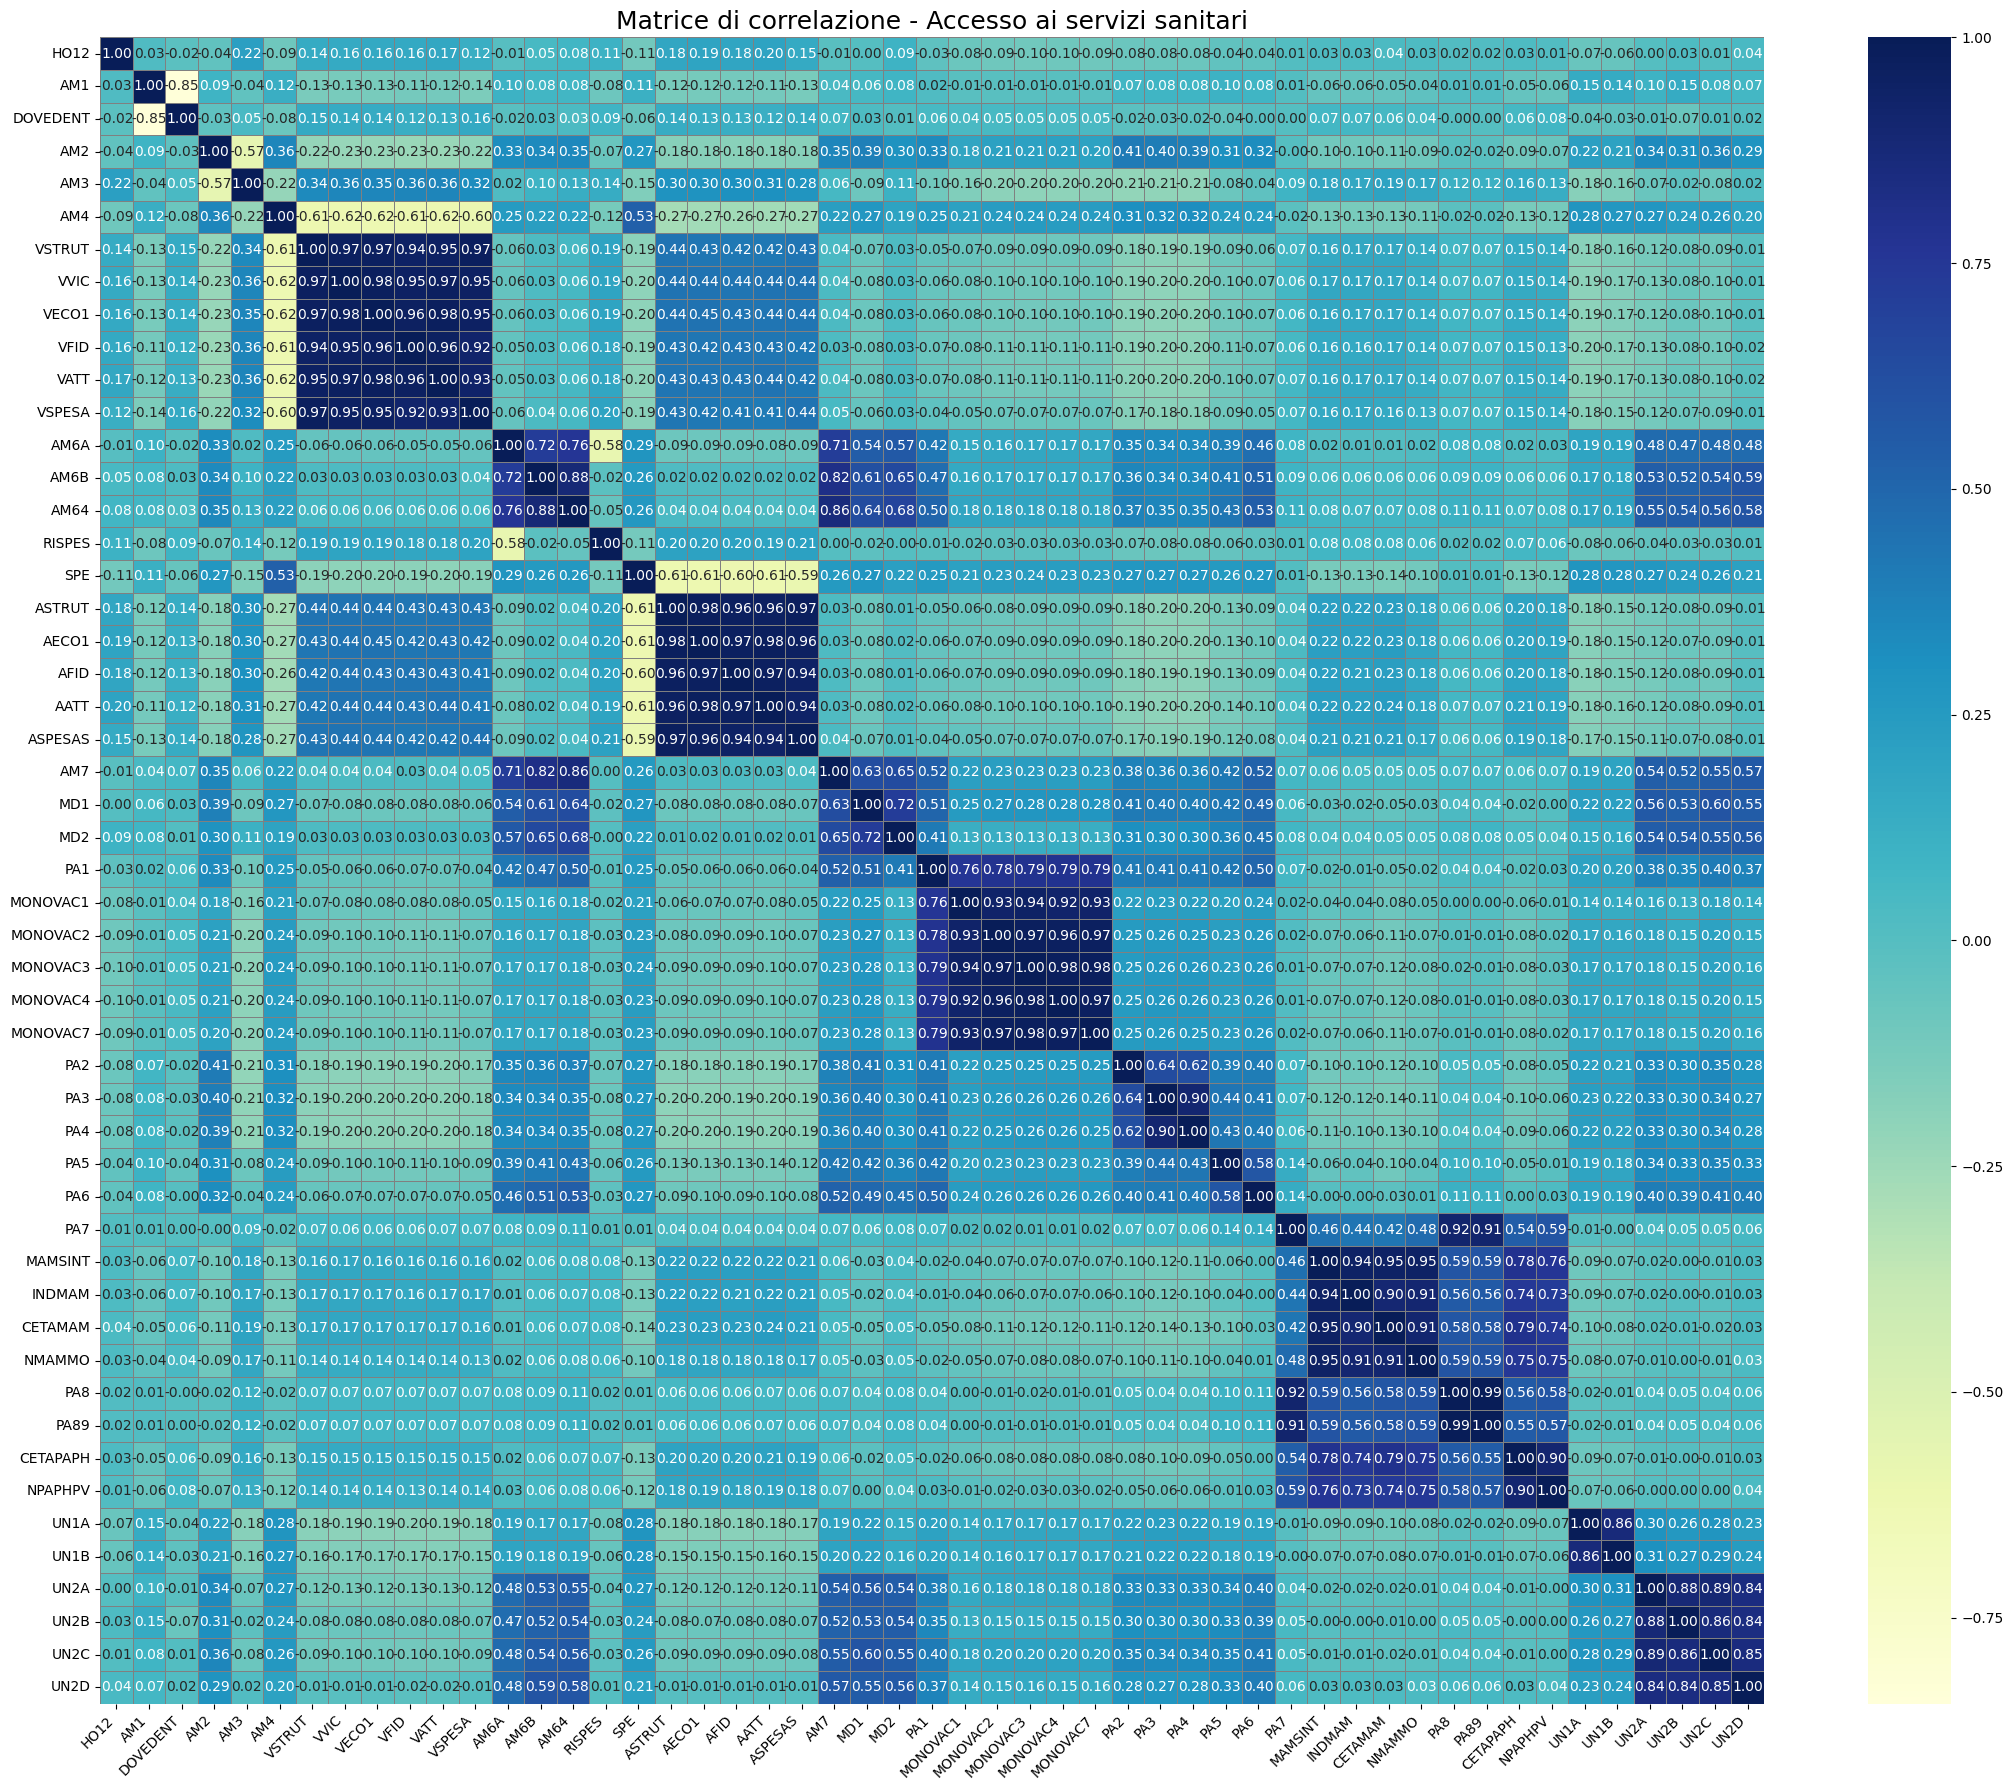

In [27]:
plt.figure(figsize=(22, 18))
sns.heatmap(
    df_tema_servizi_sanitari.corr(),
    annot=True,           # Mostra i numeri
    fmt=".2f",            # Mostra 2 decimali
    cmap="YlGnBu",        # Colormap chiara e leggibile
    linewidths=0.5,       # Linee tra le celle
    linecolor='gray'      # Colore delle linee
)
plt.title("Matrice di correlazione - Accesso ai servizi sanitari", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
